# Equipo 2

##Proyecto Integrador- Avance 2

# ***Alumnos:***

## David Moisés Alfandari Martínez - A01794577

## Fernando García Corona          - A01793717

## Jesús Elías Ruiz Montoya         - A01794485

# Avance 1. Análisis exploratorio de datos

Se mantienen y se expanden los resultados del análisis exploratorio de datos entregados la semana pasada.

In [1]:
# Montar Google Drive para cargar los datos.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [3]:
# Cargar el archivo CSV.
df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/MultiFillRadiator.csv')

<ipython-input-3-b0f0e2ba6945>:2: DtypeWarning: Columns (5,6,23,24,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/MultiFillRadiator.csv')


### Información general del DataFrame

In [4]:
# Exploración general del DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155213 entries, 0 to 155212
Data columns (total 65 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Machine                                155213 non-null  object 
 1   Timestamp                              155213 non-null  object 
 2   VIN                                    155213 non-null  object 
 3   ROT                                    155213 non-null  int64  
 4   Cycle Result                           155213 non-null  object 
 5   Failed on Field                        8 non-null       object 
 6   Machine ID                             155213 non-null  object 
 7   Cycle Time                             155213 non-null  float64
 8   Vacuum                                 155213 non-null  int64  
 9   Pressure                               155213 non-null  float64
 10  Volume                                 155213 non-null  

### Tipos de datos por columna

In [5]:
# Revisar tipos de datos.
df.dtypes

,0
Machine,object
Timestamp,object
VIN,object
ROT,int64
Cycle Result,object
...,...
Unnamed: 60,float64
Unnamed: 61,float64
Unnamed: 62,float64
Unnamed: 63,float64


Se identifican columnas que no ofrecen información valiosa. La columna 1, 2, 4, 6 y la 24. Posteriormente se disponen las columnas 33 a la 64 ya que no agregan valores útiles al análisis.

In [6]:
df.drop(df.columns[[0,1,3,6,25]], axis=1, inplace=True)
df.head()

,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,3FMCR9G61PRD83891,Pass,NaN,75.69,6,20.5,8.27,0.0,3.7,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3FTTW8F96PRA56244,Pass,NaN,77.50,9,20.8,9.11,0.0,4.2,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3FTTW8E30PRA57533,Pass,NaN,82.14,6,20.5,11.21,0.0,3.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3FTTW8F9XPRA63150,Pass,NaN,76.50,8,20.4,9.20,0.0,3.3,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3FMCR9B65PRD84047,Pass,NaN,74.91,6,20.5,8.20,0.0,4.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(df.columns[29:61], axis=1, inplace=True)
df.head()

,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Air Test Achieved Pressure Decay Time,Air Test Cycle Time,Air Test Result,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time
0,3FMCR9G61PRD83891,Pass,NaN,75.69,6,20.5,8.27,0.0,3.7,7.0,...,5.0,18.1,Pass,7,34.5,1.0,2.8,5.0,6.0,5.0
1,3FTTW8F96PRA56244,Pass,NaN,77.50,9,20.8,9.11,0.0,4.2,7.0,...,5.0,18.2,Pass,7,34.5,1.0,5.2,5.0,8.0,5.0
2,3FTTW8E30PRA57533,Pass,NaN,82.14,6,20.5,11.21,0.0,3.8,7.0,...,5.0,18.8,Pass,7,34.5,1.0,2.5,5.0,5.0,5.0
3,3FTTW8F9XPRA63150,Pass,NaN,76.50,8,20.4,9.20,0.0,3.3,7.0,...,5.0,17.8,Pass,7,34.5,1.0,5.0,5.0,8.0,5.0
4,3FMCR9B65PRD84047,Pass,NaN,74.91,6,20.5,8.20,0.0,4.0,7.0,...,5.0,17.8,Pass,7,34.5,1.0,2.9,5.0,6.0,5.0


Se identifica la columna Failed on Field como una de las más importantes del dataset, porque ahí se indican las unidades que han fallado en campo y que pasaron el proceso de planta. Se hace el reemplazo de NaN por No, para indicar que esas "no fallaron en campo", las que fallaron ya cuentan con la etiqueta "YES".


In [8]:
df['Failed on Field'].replace(np.nan, 'No', inplace=True)
df.head()

<ipython-input-8-8e07f6676a00>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Failed on Field'].replace(np.nan, 'No', inplace=True)


,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Air Test Achieved Pressure Decay Time,Air Test Cycle Time,Air Test Result,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time
0,3FMCR9G61PRD83891,Pass,No,75.69,6,20.5,8.27,0.0,3.7,7.0,...,5.0,18.1,Pass,7,34.5,1.0,2.8,5.0,6.0,5.0
1,3FTTW8F96PRA56244,Pass,No,77.50,9,20.8,9.11,0.0,4.2,7.0,...,5.0,18.2,Pass,7,34.5,1.0,5.2,5.0,8.0,5.0
2,3FTTW8E30PRA57533,Pass,No,82.14,6,20.5,11.21,0.0,3.8,7.0,...,5.0,18.8,Pass,7,34.5,1.0,2.5,5.0,5.0,5.0
3,3FTTW8F9XPRA63150,Pass,No,76.50,8,20.4,9.20,0.0,3.3,7.0,...,5.0,17.8,Pass,7,34.5,1.0,5.0,5.0,8.0,5.0
4,3FMCR9B65PRD84047,Pass,No,74.91,6,20.5,8.20,0.0,4.0,7.0,...,5.0,17.8,Pass,7,34.5,1.0,2.9,5.0,6.0,5.0


De la retroalimentación del especialista se pidió que se revisarán cuáles VINs estaban repetidos, ya que esos parámetros pueden contaminar la información. Se entienden como VINs repetidos aquellos que fallaron y posteriormente pasaron el proceso. **El miércoles 9 de Octubre se abordará el manejo de estos datos, ese día se tiene la siguiente sesión con el especialista.**

In [9]:
VIN_duplicated = df[df.duplicated(subset=[df.columns[0]], keep=False)]
VIN_duplicated.head(10)

,VIN,Cycle Result,Failed on Field,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,EPS Style Selected,...,Air Test Achieved Pressure Decay Time,Air Test Cycle Time,Air Test Result,Actual Style Selected,Vacuum Time,Pre-Flowback Stabilize Time,Vacuum Small Leak Decay Level,Vacuum Small Leak Decay Time,Vacuum 2 Level,Vacuum 2 Time
358,3FTTW8E32PRA56643,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,1.3,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0
359,3FTTW8E32PRA56643,Pass,No,80.43,8,20.5,11.18,0.0,4.0,7.0,...,5.0,19.3,Pass,7,34.5,1.0,5.3,5.0,7.0,5.0
378,3FTTW8E38PRA58347,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,1.4,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0
379,3FTTW8E38PRA58347,Pass,No,80.18,8,20.3,11.15,0.0,4.1,7.0,...,5.0,19.1,Pass,7,34.5,1.0,4.4,5.0,7.0,5.0
451,3FTTW8F94PRA65119,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,2.4,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0
452,3FTTW8F94PRA65119,Pass,No,77.79,10,20.4,9.63,0.0,3.3,7.0,...,5.0,18.2,Pass,7,34.5,1.0,8.0,5.0,10.0,5.0
512,3FTTW8E30PRA55538,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,0.6,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0
513,3FTTW8E30PRA55538,Pass,No,80.92,8,20.5,11.13,0.0,4.4,7.0,...,5.0,18.6,Pass,7,34.5,1.0,4.3,5.0,7.0,5.0
614,3FMCR9B61PRD99872,Fail,No,0.00,0,0.0,0.00,0.0,0.0,7.0,...,0.0,2.2,Fail,7,0.0,0.0,0.0,0.0,0.0,0.0
615,3FMCR9B61PRD99872,Pass,No,75.31,8,20.6,8.23,0.0,4.1,7.0,...,5.0,17.8,Pass,7,34.5,1.0,3.9,5.0,7.0,5.0


In [10]:
num_duplicated = VIN_duplicated[df.columns[0]].nunique()
num_duplicated

2170

Se identifican 2170 VINs repetidos. Se consultará al especialista cual debería ser el tratamiento de esos datos. Se piensa en varias opciones. El último VIN debería indicar que el vehículo pasó el proceso, los anteriores que fallaron. Las preguntas son, ¿por qué fallaron? ¿qué información nos dan los resultados de fallo para la predicción del modelo? Porque los fallos son variables, desde 1 hasta 12 fallos como se puede ver a continuación.

In [11]:
list_duplicated = VIN_duplicated[df.columns[0]].value_counts()
list_duplicated

,count
VIN,
0,19
3FTTW8M3XRRA16623,12
3FTTW8E36PRB02944,9
3FTTW8E39PRA76663,9
3FTTW8E38PRA66562,8
...,...
3FTTW8A34RRA04259,2
3FTTW8A33RRA03376,2
3FMCR9D98RRE04009,2


Eventualmente se realizará un análisis de esas 2170 incidencias para entender más sobre los fallos durante el proceso, por el momento solo se indicarán como valores históricos de repetición de esos vehículos.

### ¿Cuáles son las estadísticas resumidas del conjunto de datos?

Se establecen las estadísitcas de las columnas numéricas de todas las variables del dataframe.

**Se implementa la sugerencia de la realimentación del entregable anterior, se aplica la transpuesta al df**

In [12]:
# Estadísticas resumidas del conjunto de datos numéricos mediante la transpuesta para una facilitar la lectura.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle Time,155213.0,75.569631,11.150291,0.0,74.98,76.50,78.87,184.00
Vacuum,155213.0,7.508140,3.258450,-4.0,6.00,7.00,9.00,209.00
Pressure,155213.0,20.175779,3.011894,0.0,20.30,20.50,20.90,83.20
Volume,155213.0,9.140565,1.963243,0.0,8.26,9.12,9.77,81.25
Pressure Decay,155213.0,0.001394,0.109931,0.0,0.00,0.00,0.00,11.00
Flowback Volume,155213.0,4.136880,0.940396,0.0,3.80,4.20,4.80,11.00
EPS Style Selected,155213.0,7.002194,0.173951,0.0,7.00,7.00,7.00,20.90
Overflow Bottle Volume,155213.0,0.001586,0.123517,0.0,0.00,0.00,0.00,11.32
Overflow Bottle Fill Time,155213.0,0.001550,0.120214,0.0,0.00,0.00,0.00,11.31
Evac/Fill Cycle Time,155213.0,75.539688,11.104229,0.0,75.00,76.50,78.90,101.10


Se establecen las descripción de las columnas de todas las variables categóricas del dataframe.

In [13]:
df.describe(include = 'object').T

,count,unique,top,freq
VIN,155213,152778,0,19
Cycle Result,155213,3,Pass,151866
Failed on Field,155213,2,No,155205
Machine Cycle Status,155213,26,Cycle Accept,151840
Air Test Achieved Pressure Decay Time,155213,40,5,79745
Air Test Cycle Time,155213.0,380.0,18.2,6212.0
Air Test Result,155213,3,Pass,152099


### Columnas Relevantes

In [14]:
numerical_cols = ['Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume', 'EPS Style Selected', 'Overflow Bottle Fill Time', 'Evac/Fill Cycle Time' ]
categorical_cols = ['EPS Style Selected', 'Machine Cycle Status', 'Air Test Result', 'Failed on Field']
target = ['Cycle Result']

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

In [15]:
df[numerical_cols].isnull().sum()

,0
Vacuum,0
Pressure,0
Volume,0
Pressure Decay,0
Flowback Volume,0
EPS Style Selected,0
Overflow Bottle Fill Time,0
Evac/Fill Cycle Time,0


In [16]:
# Convertir columnas relevantes a numéricas, forzando que los errores sean NaN.
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir nuestra variable objetivo a 1 cuando el estado es Pass y 0 cuando no
df['Cycle Result'] = df['Cycle Result'].map({'Pass': 1}).fillna(0).astype(int)

In [17]:
# Verificar si hay valores nulos después de la conversión.
print(df[numerical_cols].isnull().sum())

Vacuum                       0
Pressure                     0
Volume                       0
Pressure Decay               0
Flowback Volume              0
EPS Style Selected           0
Overflow Bottle Fill Time    0
Evac/Fill Cycle Time         0
dtype: int64


### ¿Hay valores atípicos en el conjunto de datos?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

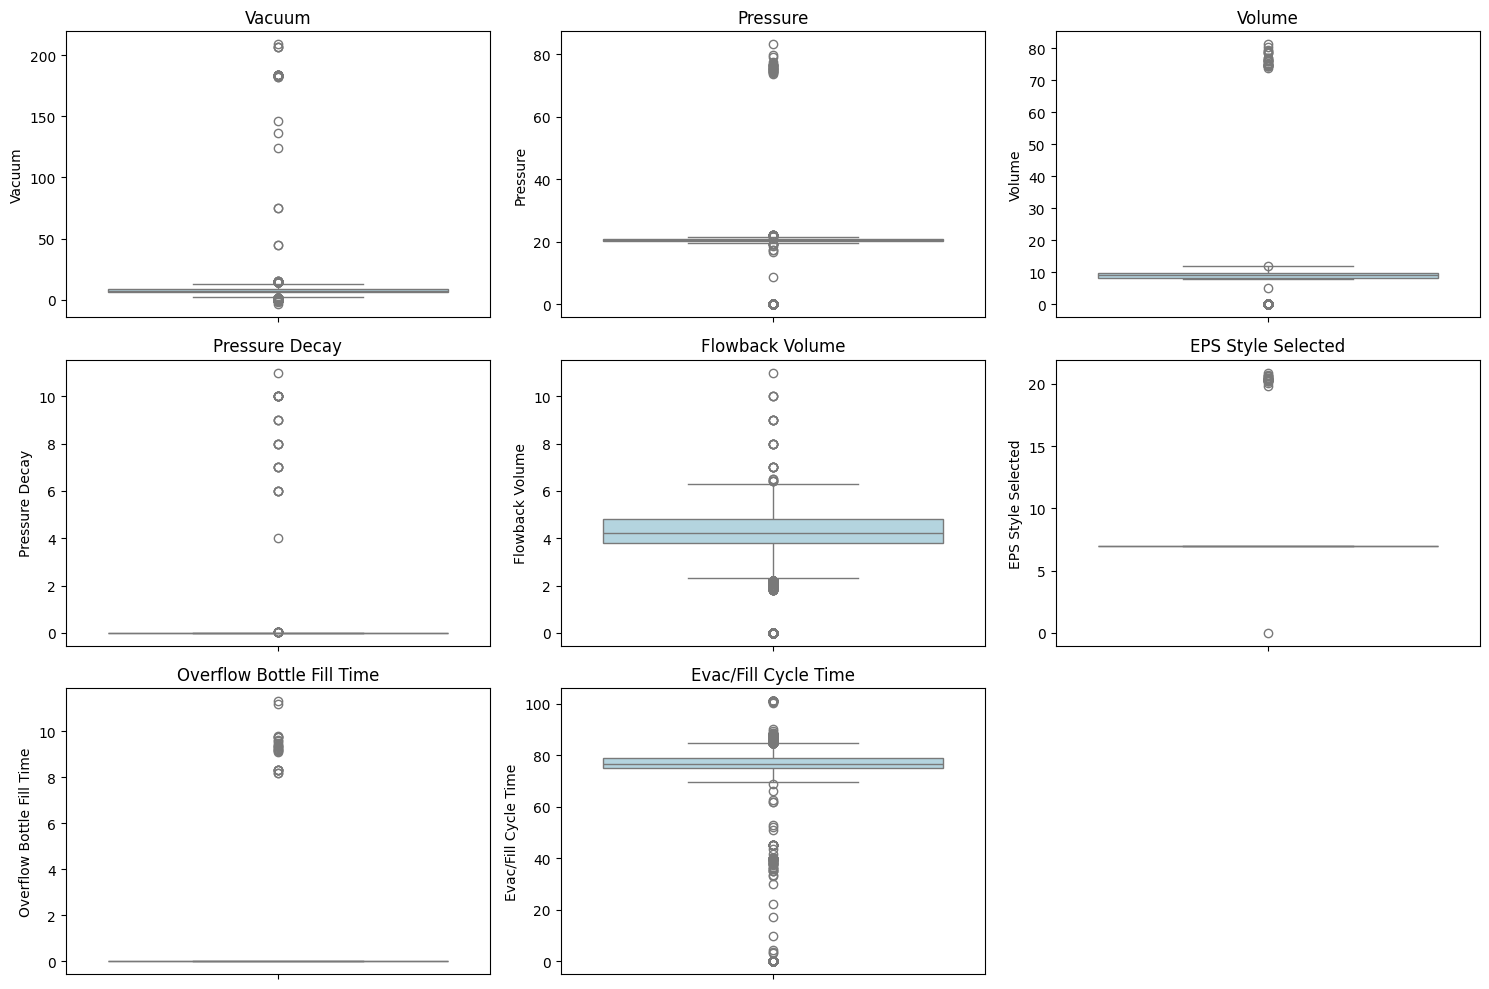

In [18]:
# Boxplots para detectar valores atípicos.

plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1  # Aseguramos que hay suficientes posiciones para los subplots.
for i, col in enumerate(numerical_cols, 1): # Iterar solo sobre las columnas válidas.
    plt.subplot(rows, 3, i) # Posicionar los subplots correctamente.
    sns.boxplot(data=df[col], color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

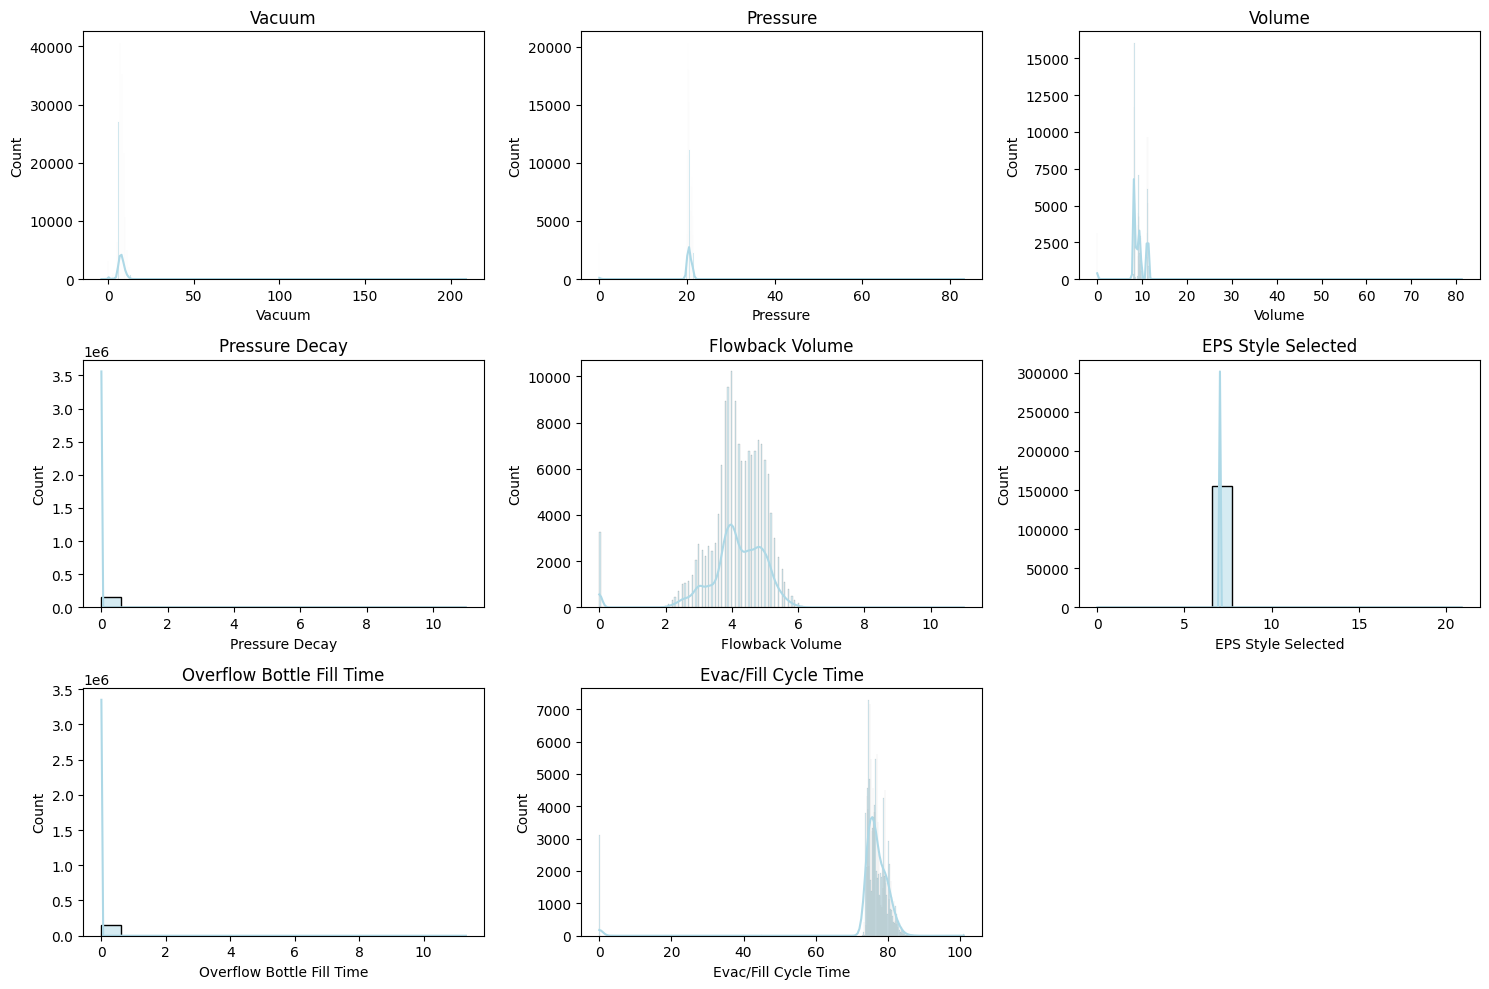

In [19]:
# Histogramas para revisar las distribuciones.
plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1
for i, col in enumerate(df[numerical_cols].select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Hay correlación entre las variables dependientes e independientes?

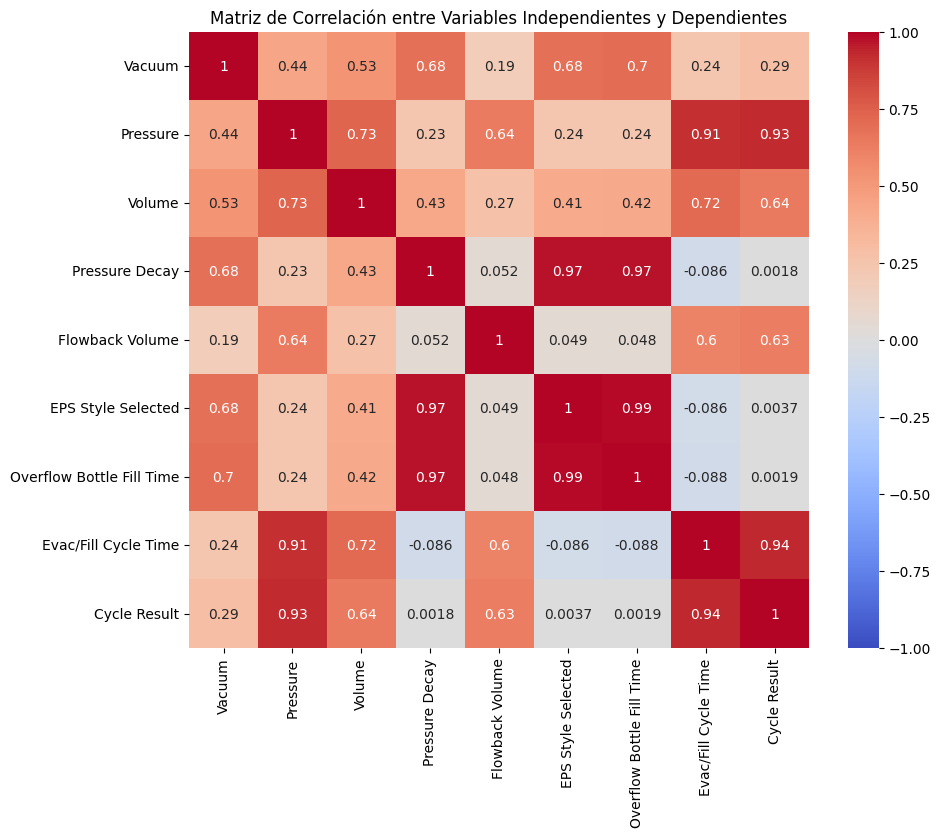

In [20]:
X = df[numerical_cols]

Y = df[target]

combined_df = pd.concat([X, Y], axis=1)

correlation_matrix = combined_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Independientes y Dependientes')
plt.show()

### ¿Cómo se distribuyen los datos en función de diferentes categorías?

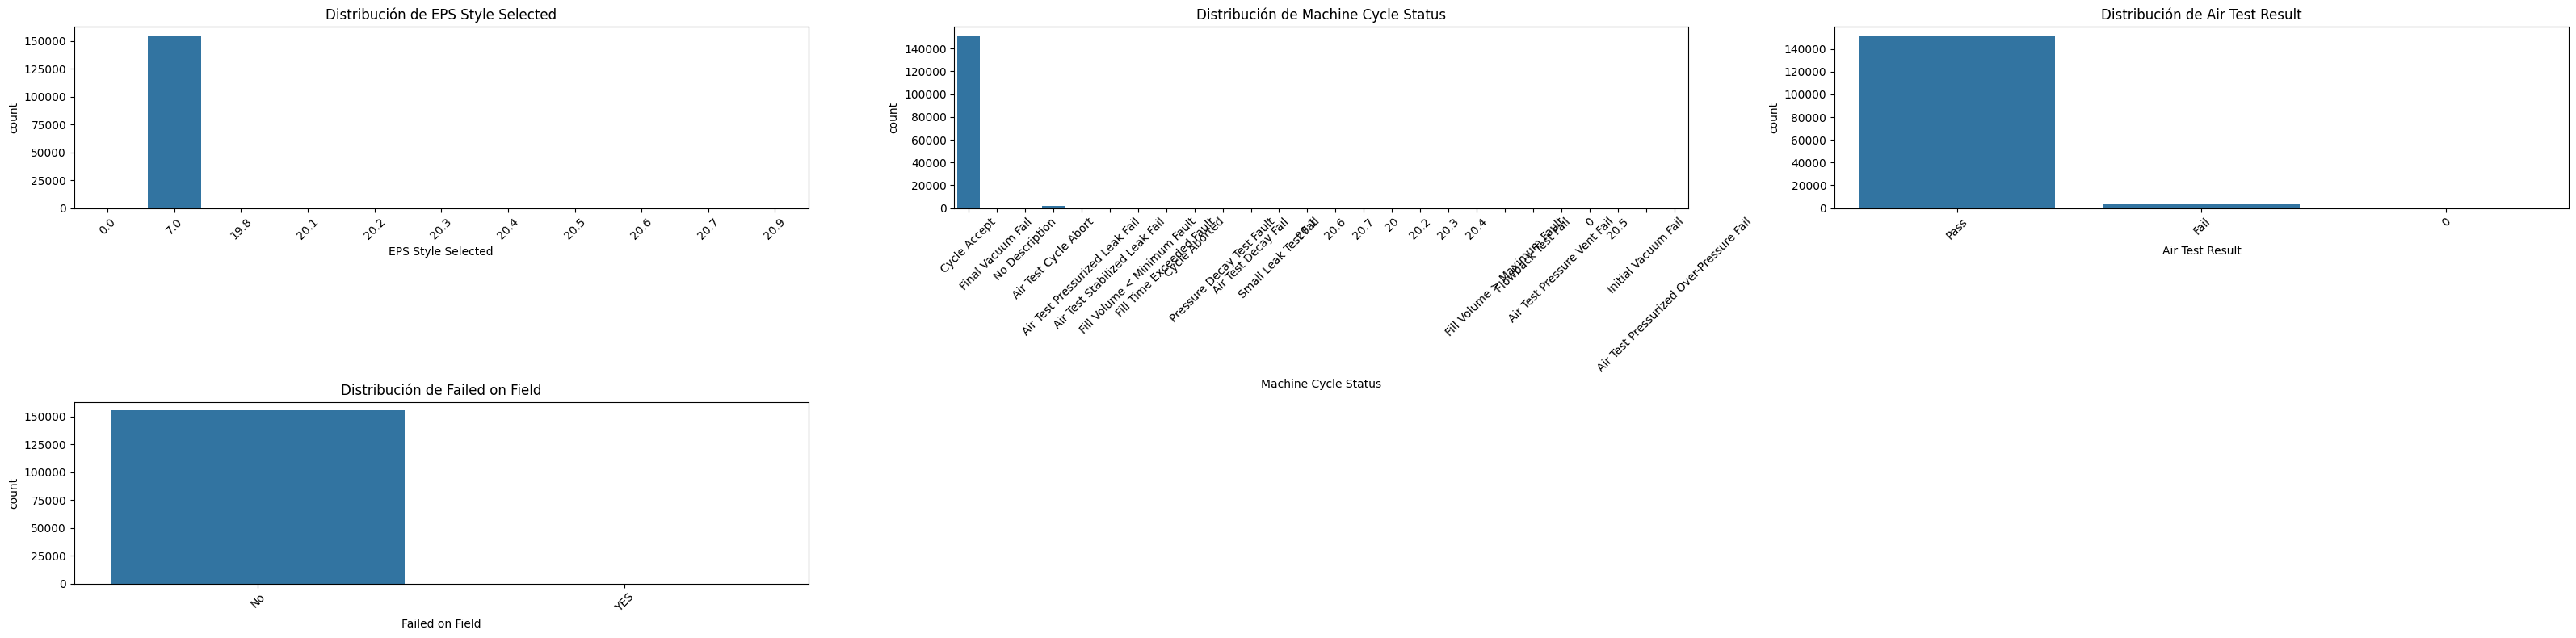

In [21]:
# Visualización de la distribución de datos en función de diferentes categorías.
plt.figure(figsize=(32, 8))
rows = (len(categorical_cols) // 3) + 1

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=df[col], data=df)
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xticks(rotation=45)  # Rotación de los nombres de las categorías.

plt.tight_layout()
plt.show()

### ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

Vacuum                       0
Pressure                     0
Volume                       0
Pressure Decay               0
Flowback Volume              0
EPS Style Selected           0
Overflow Bottle Fill Time    0
Evac/Fill Cycle Time         0
dtype: int64


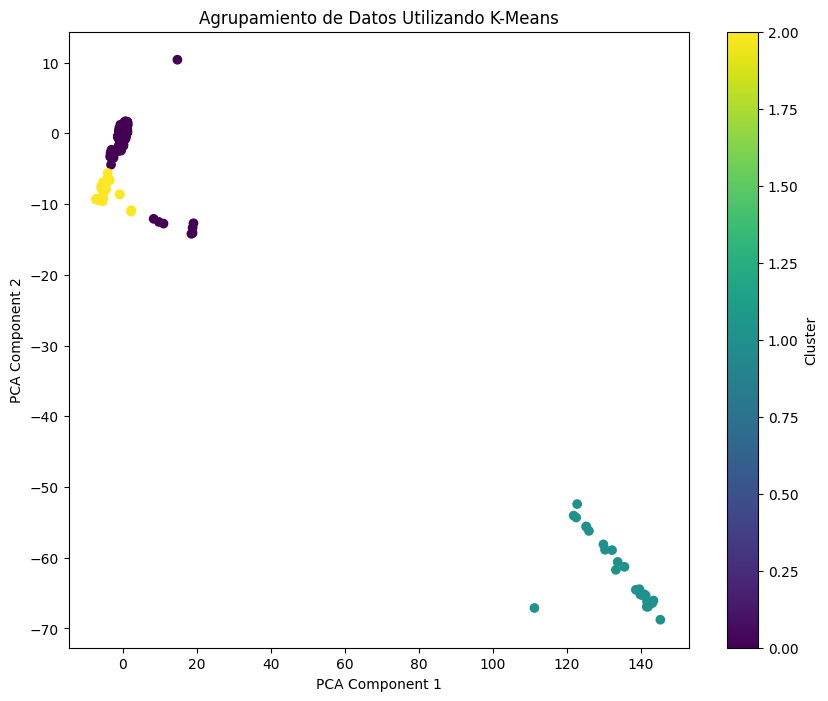

In [22]:
# Verificamos si hay valores nulos en las columnas seleccionadas.
print(df[numerical_cols].isnull().sum())

# Imputación o eliminación de valores nulos (aquí se eliminamos las filas con NaN).
df_clean = df[numerical_cols].dropna()

# Estandarización de los datos.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Realizamos los agrupamientos por medio de: K-means clustering.
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizamos los clusters utilizando PCA para reducir la dimensionalidad a 2D.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clean['Cluster'], cmap='viridis')
plt.title('Agrupamiento de Datos Utilizando K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

### ¿Se deberían normalizar las imágenes para visualizarlas mejor? No se trabaja con imagenes

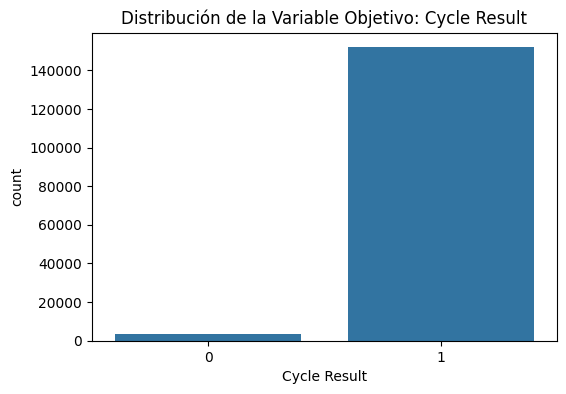

Cycle Result
1    0.978436
0    0.021564
Name: proportion, dtype: float64


In [26]:
# Comprobación de desequilibrio en la variable objetivo 'Cycle Result'.
plt.figure(figsize=(6, 4))
sns.countplot(x='Cycle Result', data=df)
plt.title('Distribución de la Variable Objetivo: Cycle Result')
plt.show()

# Visualización de la proporción de clases.
class_distribution = df['Cycle Result'].value_counts(normalize=True)
print(class_distribution)

In [27]:
# Eliminación de 'Failed on Field' y 'VIN' antes del K-means.
df_cluster = df.drop(columns=['Failed on Field', 'VIN'])

# Selección únicamente de las columnas numéricas.
df_cluster = df_cluster.select_dtypes(include=[np.number])

# Escalamiento los datos numéricos.
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

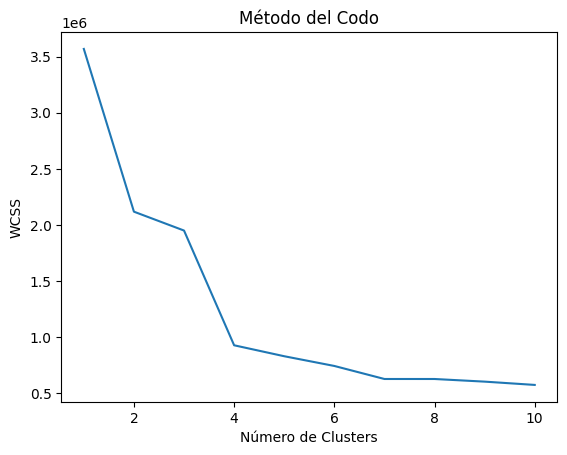

In [28]:
# Gráfico del método del codo para determinar el número de clusters
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, random_state=42)
   kmeans.fit(df_scaled)
   wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

Se utiliza el método del codo porque es un mecanismo fácil de entender e interpretar con base al gráfico resultante. En el caso del resultado obtenido podemos encontrar claramente el punto donde ocurre la disminución más marcada del WCSS está en el número 3 del eje X, ya que el primer doblez no representa un decenso significativo, por lo que podríamos decir que el número óptimo de cluster pareciera ser 3.

In [75]:
# Aplicar K-means con 2 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
df['KMeans_Labels'] = kmeans.predict(df_scaled)

In [76]:
# Comparación de clusters con 'Failed on Field'
print(pd.crosstab(df['KMeans_Labels'], df['Failed on Field']))

Failed on Field     No  YES
KMeans_Labels              
0                68721    0
1                 3118    0
2                83366    8


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

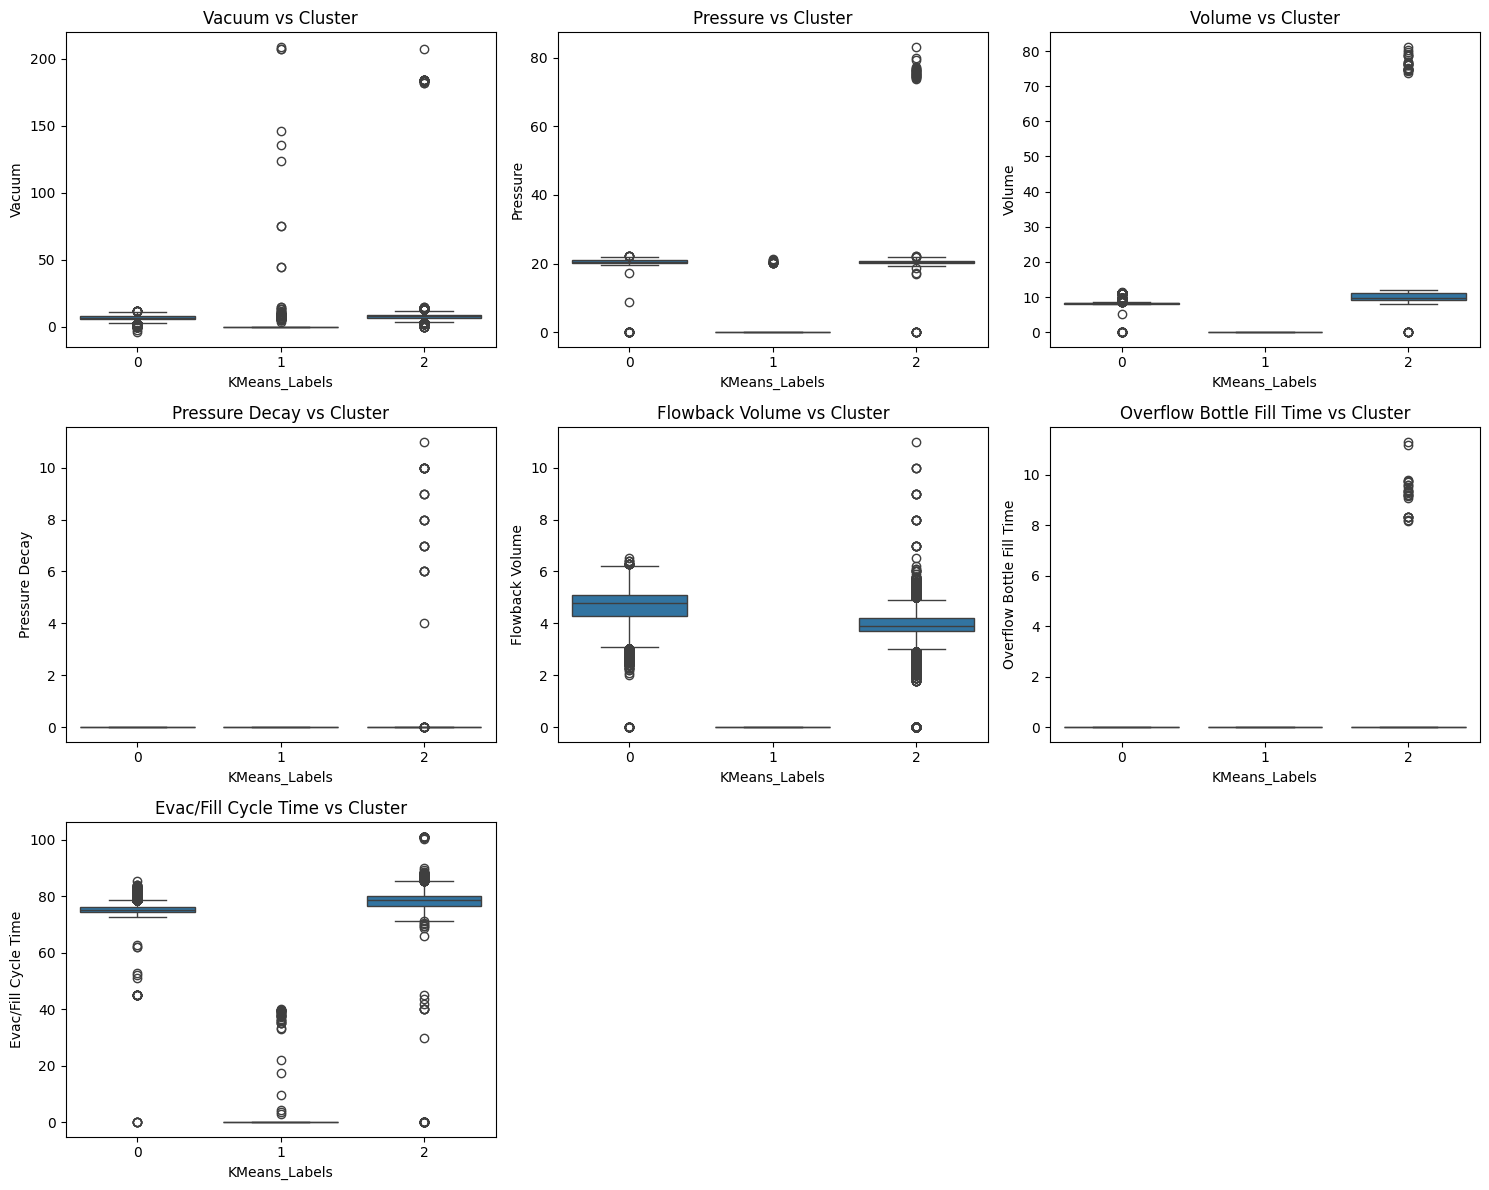

In [77]:
# Graficar distribución de variables numéricas por cluster
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
   plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
   sns.boxplot(x='KMeans_Labels', y=col, data=df)
   plt.title(f'{col} vs Cluster')
plt.tight_layout()
plt.show()

# Conclusiones
## Calidad y estructura de los datos
Es importante verificar si existen valores nulos en las variables numéricas del conjunto de datos que puedan impactar el análisis de exploración inicial y que posteriormente, podría impedir el proceso de agrupamiento o 'clustering'. Con el objetivo de mantener la fluidez y la integridad del análisis incluso con bases de datos postriores, fue necesario imputar dichos valores nulos o eliminar las filas correspondientes.
Por otro lado, se realizó un análisis de las estadísticas descriptivas para obtener una visión general de las distribuciones y rangos de las variables. A partir de la observación de los gráficos identificamos la necesidad de transformaciones adicionales en un tratamiento posterior.

## Valores atípicos y distribuciones
Por medio de diagramas de caja o 'boxplots', identificamos la existencia de valores atípicos en algunas variables importantes como en el tiempo del ciclo de evacuación/llenado y el volumen de llenado. La existencia de estos valores a los extremos pueden estar teniendo injerencia en el proceso general y pueden estar influyendo en las incidencias de fallos observados. Consideramos importante compartir estas observaciones con el especialista para ponderar el potencial impacto de estas desviaciones en las distribuciones.

## Correlaciones
Por medio de la matriz de correlación entre variables independientes y dependientes observamos algunas relaciones de moderada preponderancia entre algunas variables como la presión y el tiempo del ciclo de llenado, a partir de las cuales podemos sugerir el uso de modelos supervizados para predecir las magnitudes adecuadas en variables de interés.

## Patrones de datos a partir del Clustering o agrupamiento
Se aplicó el algoritmo 'K-means' para la agrupación de muestras en función de la similitud entre sus características, y el análisis visual por medio de PCA indica que los datos pueden identificarse dentro de tres 'clusters' o grupos principales. Esto sugiere  diferentes grupos de máquinas o comportamientos durante los procesos de llenado. Los patrones pueden ser útiles para una posterior segmentación entre grupos de operación en las máquinas.

## Comentarios sobre el análisis posterior
La agrupación de datos con K-Means y su comparación contra la variable referencia 'Failed on Field' nos permitió identificar patrones dentro de los datos. El análisis PCA identifica ciertas características que pueden ser fundamentales para poder predecir los fallos en campo. Los gráficos de barras y boxplots nos dan una visión más clara de la distribución que tienen las variables categóricas y su relación con el objetivo. El análisis bivariado de variables numéricas (por ejemplo: 'Pressure' vs 'Failed on Field') exhibió diferencias significativas, lo cual puede ser un indicativo de problemas en el proceso de llenado de refrigerante. Revisaremos este punto interesante con el especialista.

# Avance 2. Ingeniería de características

### Importación de las librerías para asegurar la funcionalidad necesaria a la ingeniería de características.

In [32]:
# Importación de las librerías adicionales para la ingeniería de características, manejo de las variables categóricas y selección.
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

### Discretización de 'Volume'
La discretización nos permite simplificar la manera en que tendrá que realizar el modelo la interpretación de la variable 'Volume', por lo que es un procedimiento útil para agrupar valores continuos en categorías discretas. Decidimos dividir 'Volume' en 5 categorías con el objetivo de identificar patrones ocultos. El número 5 se selecciona de manera arbitraria para este ejercicio, se exploraron otros valores y no se vió diferencia significativa, por lo que se asume que los datos se encuentran bien distribuidos en ese número de "contenedores".



In [33]:
# Discretización (binning) en algunas variables numéricas.
# Utilización de 'KBinsDiscretizer' para dividir la variable 'Volume' en 5 grupos (bins).
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_clean['Volume_binned'] = discretizer.fit_transform(df_clean[['Volume']])

### Creación de interacciones entre las variables para capturar relaciones.
Realizamos una interacción entre 'Vacuum' y 'Pressure' para capturar las relaciones no lineales y generar nuevas características, mejorando así el rendimiento del modelo.

In [34]:
# Generación de nuevas características; por ejemplo, creamos una interacción entre 'Vacuum' y 'Pressure'.
# Esta interacción nos ayudará a aprender relaciones no lineales en el modelo.
df_clean['Vacuum_Pressure_Interaction'] = df_clean['Vacuum'] * df_clean['Pressure']

In [35]:
df_clean['Vacuum_Pressure_Interaction'].head()

,Vacuum_Pressure_Interaction
0,123.0
1,187.2
2,123.0
3,163.2
4,123.0


A partir de esta nueva relación y características, exploramos la relación que guarda con parámetros críticos del proceso y de sus datos. Como ejemplo, interpolamos con volúmen, con el ciclo de tiempo de Evac and Fill y finalmente con Flowback Volume. La intención es mostrar estas relaciones al especialista y definir si existe algún interés en las relaciones o si se debe expandir o enfocar a algo más.

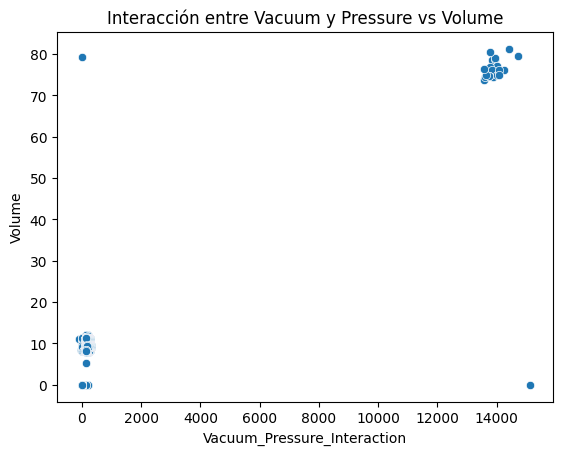

In [36]:
# Gráfico de dispersión de la nueva columna vs la variable volume
sns.scatterplot(x='Vacuum_Pressure_Interaction', y='Volume', data=df_clean)
plt.title('Interacción entre Vacuum y Pressure vs Volume')
plt.show()

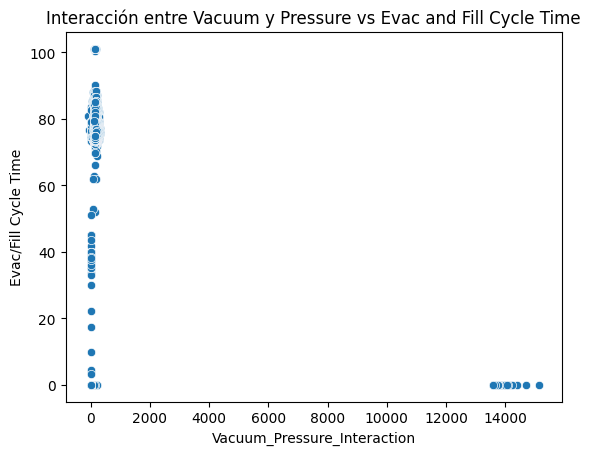

In [41]:
# Gráfico de dispersión de la nueva columna vs la variable Evac and Fill Cycle Time
sns.scatterplot(x='Vacuum_Pressure_Interaction', y='Evac/Fill Cycle Time', data=df_clean)
plt.title('Interacción entre Vacuum y Pressure vs Evac and Fill Cycle Time')
plt.show()

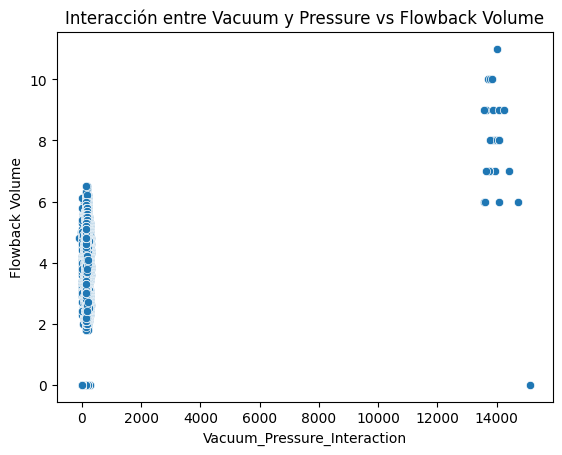

In [39]:
# Gráfico de dispersión de la nueva columna vs la variable Flowback Volume
sns.scatterplot(x='Vacuum_Pressure_Interaction', y='Flowback Volume', data=df_clean)
plt.title('Interacción entre Vacuum y Pressure vs Flowback Volume')
plt.show()

### Codificación 'One-Hot' para convertir las variables categóricas en un formato utilizable por los modelos de aprendizaje automático que requieren variables numéricas. Mediante la opción drop='first' se evita la multicolinealidad removiendo una de las categorías.

In [42]:
# Codificación One-Hot para las variables categóricas. Conversión de las variables categóricas en variables 'dummies' para su interpretación en los modelos de ML.
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_cols])

In [43]:
# Conversión de las variables codificadas a un DataFrame para poder concatenarlas con el DataFrame original.
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

In [44]:
# Concatenación del DataFrame original con las nuevas variables codificadas.
df_clean = pd.concat([df_clean, encoded_categorical_df], axis=1)

In [45]:
df_clean.head().T

,0,1,2,3,4
Vacuum,6.00,9.00,6.00,8.0,6.0
Pressure,20.50,20.80,20.50,20.4,20.5
Volume,8.27,9.11,11.21,9.2,8.2
Pressure Decay,0.00,0.00,0.00,0.0,0.0
Flowback Volume,3.70,4.20,3.80,3.3,4.0
EPS Style Selected,7.00,7.00,7.00,7.0,7.0
Overflow Bottle Fill Time,0.00,0.00,0.00,0.0,0.0
Evac/Fill Cycle Time,75.70,77.50,82.10,76.5,74.9
Cluster,0.00,0.00,0.00,0.0,0.0
Volume_binned,0.00,0.00,0.00,0.0,0.0


### Verificación de la existencia de las columnas categóricas originales, antes de cualquier eliminación que implique errores.

*Este paso parece redundante, pero se tuvo que realizar para poder ejecutar los pasos siguientes.*

In [46]:
# Verificación si las columnas categóricas están presentes antes de eliminarlas para prevenir errores al eliminar elementos que no existen en el DataFrame.
columns_to_drop = [col for col in categorical_cols if col in df_clean.columns]

In [47]:
# Eliminación sólo de las columnas que están presentes.
df_clean.drop(columns=columns_to_drop, inplace=True)

In [48]:
# Verificación de que las columnas se eliminaron correctamente para asegurar que las transformaciones se aplicaron adecuadamente.
df_clean.head().T

,0,1,2,3,4
Vacuum,6.00,9.00,6.00,8.0,6.0
Pressure,20.50,20.80,20.50,20.4,20.5
Volume,8.27,9.11,11.21,9.2,8.2
Pressure Decay,0.00,0.00,0.00,0.0,0.0
Flowback Volume,3.70,4.20,3.80,3.3,4.0
Overflow Bottle Fill Time,0.00,0.00,0.00,0.0,0.0
Evac/Fill Cycle Time,75.70,77.50,82.10,76.5,74.9
Cluster,0.00,0.00,0.00,0.0,0.0
Volume_binned,0.00,0.00,0.00,0.0,0.0
Vacuum_Pressure_Interaction,123.00,187.20,123.00,163.2,123.0


### Normalización de las características
Este paso es importante para que las variables numéricas tengan una media de 0 y desviación estándar de 1; con lo cual se busca que todas las características tengan una preponderancia equivalente en el análisis. Se evitan las despropociones porque todas estarán a la misma escala.

In [50]:
# Verificación de las columnas en df_clean.
print(df_clean.columns)

Index(['Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume',
       'Overflow Bottle Fill Time', 'Evac/Fill Cycle Time', 'Cluster',
       'Volume_binned', 'Vacuum_Pressure_Interaction',
       'EPS Style Selected_7.0', 'EPS Style Selected_19.8',
       'EPS Style Selected_20.1', 'EPS Style Selected_20.2',
       'EPS Style Selected_20.3', 'EPS Style Selected_20.4',
       'EPS Style Selected_20.5', 'EPS Style Selected_20.6',
       'EPS Style Selected_20.7', 'EPS Style Selected_20.9',
       'Machine Cycle Status_20', 'Machine Cycle Status_20.1',
       'Machine Cycle Status_20.2', 'Machine Cycle Status_20.3',
       'Machine Cycle Status_20.4', 'Machine Cycle Status_20.5',
       'Machine Cycle Status_20.6', 'Machine Cycle Status_20.7',
       'Machine Cycle Status_Air Test Cycle Abort',
       'Machine Cycle Status_Air Test Decay Fail',
       'Machine Cycle Status_Air Test Pressure Vent Fail',
       'Machine Cycle Status_Air Test Pressurized Leak Fail',
       'Mach

In [51]:
# Actualiza la lista de columnas numéricas
numerical_cols = [col for col in numerical_cols if col in df_clean.columns]
print("Columnas numéricas actualizadas:", numerical_cols)

Columnas numéricas actualizadas: ['Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume', 'Overflow Bottle Fill Time', 'Evac/Fill Cycle Time']


In [52]:
# Escalamiento o Estandarización de las características numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[numerical_cols + ['Volume_binned', 'Vacuum_Pressure_Interaction']])

In [56]:
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols + ['Volume_binned', 'Vacuum_Pressure_Interaction'])
scaled_df.head().T

,0,1,2,3,4
Vacuum,-0.462841,0.457845,-0.462841,0.150949,-0.462841
Pressure,0.107647,0.207253,0.107647,0.074445,0.107647
Volume,-0.443434,-0.015569,1.054093,0.030274,-0.479089
Pressure Decay,-0.012677,-0.012677,-0.012677,-0.012677,-0.012677
Flowback Volume,-0.464571,0.067121,-0.358233,-0.889926,-0.145556
Overflow Bottle Fill Time,-0.012898,-0.012898,-0.012898,-0.012898,-0.012898
Evac/Fill Cycle Time,0.014437,0.176538,0.590796,0.086482,-0.057608
Volume_binned,-0.012944,-0.012944,-0.012944,-0.012944,-0.012944
Vacuum_Pressure_Interaction,-0.179107,0.171545,-0.179107,0.040460,-0.179107


### Aplicación de transformación logarítmica y Box-Cox para características numéricas sesgadas mejorando así la estabilidad y el rendimiento del modelo.

In [57]:
# Verificar los valores en la columna 'Volume'
print(df_clean['Volume'].describe())

# Aseguramiento de que todos los valores sean estrictamente positivos mediante la adición de una constante.
if (df_clean['Volume'] <= 0).any():
    df_clean['Volume'] = df_clean['Volume'] + abs(df_clean['Volume'].min()) + 1

# Aplicación de la transformación Box-Cox
pt = PowerTransformer(method='box-cox')
df_clean['Transformed_Volume'] = pt.fit_transform(df_clean[['Volume']])

count    155213.000000
mean          9.140565
std           1.963243
min           0.000000
25%           8.260000
50%           9.120000
75%           9.770000
max          81.250000
Name: Volume, dtype: float64


### Se eliminan las características con baja varianza que aportan poca información útil para reducir la dimensionalidad y complejidad del modelo. Adicionalmente, se aplica la prueba Chi-cuadrado para seleccionar las más relevantes.

In [58]:
# Selección de características utilizando umbral de varianza. Posteriormente, se eliminan las características con baja varianza que aportan poca información útil para el análisis.
selector = VarianceThreshold(threshold=0.1)
high_variance_features = selector.fit_transform(scaled_features)

In [59]:
# Verificación de las columnas presentes en df_clean.
print(df_clean.columns)

Index(['Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume',
       'Overflow Bottle Fill Time', 'Evac/Fill Cycle Time', 'Cluster',
       'Volume_binned', 'Vacuum_Pressure_Interaction',
       'EPS Style Selected_7.0', 'EPS Style Selected_19.8',
       'EPS Style Selected_20.1', 'EPS Style Selected_20.2',
       'EPS Style Selected_20.3', 'EPS Style Selected_20.4',
       'EPS Style Selected_20.5', 'EPS Style Selected_20.6',
       'EPS Style Selected_20.7', 'EPS Style Selected_20.9',
       'Machine Cycle Status_20', 'Machine Cycle Status_20.1',
       'Machine Cycle Status_20.2', 'Machine Cycle Status_20.3',
       'Machine Cycle Status_20.4', 'Machine Cycle Status_20.5',
       'Machine Cycle Status_20.6', 'Machine Cycle Status_20.7',
       'Machine Cycle Status_Air Test Cycle Abort',
       'Machine Cycle Status_Air Test Decay Fail',
       'Machine Cycle Status_Air Test Pressure Vent Fail',
       'Machine Cycle Status_Air Test Pressurized Leak Fail',
       'Mach

In [60]:
# Debido a que 'Cycle Result' no está en df_clean, se añade desde df.
if 'Cycle Result' in df.columns:
    df_clean['Cycle Result'] = df['Cycle Result']

In [61]:
df_clean['Cycle Result'].head()

,Cycle Result
0,1
1,1
2,1
3,1
4,1


### Ya que Chi-cuadrado es una técnica estadística eficaz para evaluar la relación que guardan las variables categóricas con la objetivo, aplicamos dicha prueba para identificar las características relevantes a 'Cycle Result'.

In [62]:
from sklearn.feature_selection import SelectKBest, chi2

# Verificación de que 'Cycle Result' esté en df_clean.
if 'Cycle Result' not in df_clean.columns:
    df_clean['Cycle Result'] = df['Cycle Result']

In [63]:
# Separación de las variables categóricas y la variable objetivo.
X_categorical = df_clean.drop(columns=['Cycle Result'])  # Variables categóricas codificadas.
y = df_clean['Cycle Result']  # Variable objetivo.

In [64]:
# Aplicación de Chi-cuadrado
# Debido a que Chi-cuadrado solo funciona con variables no negativas, aseguramos que los valores sean positivos.
X_categorical = X_categorical.apply(pd.to_numeric, errors='coerce').abs()

In [65]:
# Selección de las mejores características categóricas utilizando Chi-cuadrado.
selector_chi2 = SelectKBest(chi2, k='all')  # Selección de todas las características para ver sus puntuaciones.
selector_chi2.fit(X_categorical, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7b1b215f6440>)

In [66]:
# Obtención de las puntuaciones de Chi-cuadrado
chi2_scores = pd.DataFrame({'Feature': X_categorical.columns, 'Chi2 Score': selector_chi2.scores_})
# Ordenamiento de las características por su puntaje Chi-cuadrado de mayor a menor.
chi2_scores = chi2_scores.sort_values(by='Chi2 Score', ascending=False)

In [67]:
# Impresión de las características ordenadas por su puntaje Chi-cuadrado.
print(chi2_scores)

                                              Feature     Chi2 Score
9                         Vacuum_Pressure_Interaction  465496.343242
7                                             Cluster  283539.131238
6                                Evac/Fill Cycle Time  221989.011348
45                               Air Test Result_Fail  140068.820436
28          Machine Cycle Status_Air Test Cycle Abort   91564.262922
48                                 Transformed_Volume   87130.396759
1                                            Pressure   60001.165137
2                                              Volume   24538.921455
31  Machine Cycle Status_Air Test Pressurized Leak...   21734.034658
0                                              Vacuum   18494.953425
29           Machine Cycle Status_Air Test Decay Fail   15154.838363
4                                     Flowback Volume   13195.234043
33  Machine Cycle Status_Air Test Stabilized Leak ...   11161.946818
35                  Machine Cycle 

### Implementamos PCA para reducir dimensionalidad y facilitar el modelado sin sacrificar información valiosa.

In [68]:
# Reducción de dimensionalidad utilizando PCA.
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [69]:
# Resultados del PCA.
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Singular Values:", pca.singular_values_)

Explained Variance Ratio: [0.55912008 0.29517152]
Singular Values: [883.76713446 642.12936043]


Antes de desarrollar nuestras conclusiones, es imperativo mencionar que se decidió usar la variable "Volume" para nuestro entregable 2, debido a la sugerencia que nos hizo el especialista en la primera revisión. Sin embargo, es importante mencionar que su postura no fue fija, sino que se consideró como punto de partida. Con base a esta premisa, consideramos que después de la segunda revisión la selección de variables puede cambiar o re enfocarse en lo que el especialista considere de interés con los resultados presentados. Dado el caso, se actualizará de manera complementaria la libreta para reflejar y discutir las acciones complementarias y sus efectos.

Otro aspecto importante es que se considerarón los comentarios de la entrega anterior para mejorar los resultados del análisis exploratorio presentado el avance 1. Dichos cambios nos permitieron obtener "insights" adicionales que de entrada muestran algunas características interesantes de la distribución de datos donde se encuentran las unidades que fallan en campo vs las que no. Para ello se agregó el uso del método del codo, el cuál nos permitió observar claramente como el número de clusters para ese punto es 3, ya que el cambio más rápido o significativo ocurre ahí. Usando esa definición, pudimos partir el total de datos en 3 bines y observar sus características. Sin embargo, entendemos que la muestra de fallos sigue siendo baja y no podemos generalizar en este punto, pero, con esto podremos tener preguntas específicas para la revisión con el especialista y una perspectiva de como se comportan los datos en cada sub grupo.

##Conclusiones del avance 2##

La ingeniería y selección de características nos ha permitido transformar el conjunto de datos original en una versión más estructurada que favorezca el análisis. La creación de nuevas variables a partir de interacciones (como 'Vacuum' con 'Pressure'), nos permite conocer relaciones que en primera instancia no son evidentes con las variables originales; aumentando así, la capacidad de predicción del modelo con mayor precisión. Se seleccionó esta combinación debido a la relevancia que tienen estos dos parámetros en el proceso, así como punto de partida para evaluar su relevancia y resultados con el especialista. Es importante mencionar que el siguiente miércoles, se tendrá la revisión con él y potencialmente la decisiones tomadas en esta entrega serán modificadas. Los potenciales cambios o las sugerencias recibidas se abordarán con detalle en la siguiente entrega.

Por otro lado, se realizó la eliminación de características con baja varianza, las cuales pueden desviar la eficiencia del modelo al considerar información irrelevante y ocasionando futuros problemas durante el entrenamiento. Centrarse en la variables que tienen verdadera influencia sobre el parámetro objetivo (salida) mejora la capacidad de interpretación y la identificación de patrones.

Asimismo, la codificación 'One-Hot' de las variables categóricas permite un procesamiento numérico de los atributos cualitativos para un procesamiento adecuado de los algoritmos de aprendizaje automático, además se consideró ésta debido a su flexibilidad para aplicarla a una gamma amplia de variables categóricas con independencia al número de éstas. Auando a esto, la eliminación de colinealidad evita problemas asociados a la estimación de los coeficientes.

Finalmente, pero no menos importante se utilizó la prueba Chi-cuadrado para seleccionar características, a partir de una evaluación numérica (cuantitativa) de las variables. De esta manera, por medio del puntaje y la ponderación se mejora la capacidad del modelo en la generalización de datos no vistos facilitando la interpretación. Los resultados fueron interesantes, y estos se discutirán de igual manera con el especialista. Como se mencionó anteriormente, en este punto se está evaluando con base a las recomendaciones iniciales, pero esperamos que con este avance, el enfoque se ajuste (o no) a la realimentación que se nos de en los siguientes días.

En suma, esta serie de pasos críticos en el análisis de información, nos permite contar con un conjunto de datos optimizado, robusto y relevante al momento, con base a las definiciones iniciales de valores críticos, que independientemente si se alterán o no, sentarán as bases para que los modelos subsecuentes sean más eficientes al tener menores tiempos de entrenamiento y mejor capacidad predictiva. Con esto, se podrán comparar diferentes algoritmos (regresión logística, árbol de decisión, máquinas de soporte vectorial, entre otras) para determinar con cuál podremos tener mejor rendimiento con base en distintas métricas seleccionando el modelo más adecuado para nuestro objetivo final.